In [79]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, LSTM, concatenate, Dense, GRU, Attention, MultiHeadAttention, LayerNormalization, TimeDistributed, Flatten, Dropout
from tensorflow.keras import  callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import GlobalAveragePooling1D, BatchNormalization 
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#data 불러오기 
import pickle

total_data_path = '/content/total_data_dips.pkl'
with open(total_data_path, 'rb') as f:
    total_data_dips = pickle.load(f)

outputvec_path = '/content/outputvec_dips.pkl'
with open(outputvec_path, 'rb') as f:
    outputvec_dips = pickle.load(f)

#데이터 표현 바꿔보기 
data_path = '/content/data_changed.pkl'
with open(data_path, 'rb') as f:
    data_changed = pickle.load(f)



total_data_dips=np.array(total_data_dips)
outputvec_dips=np.array(outputvec_dips)
data_changed=np.array(data_changed)


In [4]:
print(total_data_dips.shape,outputvec_dips.shape,data_changed.shape)

(422, 16, 240) (422, 4) (422, 5, 16, 48)


In [6]:
#test set

text_x = '/content/test_x.pkl'
with open(text_x, 'rb') as f:
    text_x = pickle.load(f)

# outputvec_dips.pkl 파일 경로
testoutput_dips = '/content/testoutput_dips.pkl'
with open(testoutput_dips, 'rb') as f:
    testoutput_dips = pickle.load(f)

test_data_240 = '/content/test_data_240.pkl'
with open(test_data_240, 'rb') as f:
    test_data_240 = pickle.load(f)


In [7]:
print(text_x.shape,testoutput_dips.shape,test_data_240.shape)

(144, 5, 16, 48) (144, 4) (144, 16, 240)


In [78]:
# 4차원 벡터 4개로 나눠주는 과정

y1=[]
y2=[]
y3=[]
y4=[]
for i in outputvec_dips:
    y1.append([i[0]])
    y2.append([i[1]])
    y3.append([i[2]])
    y4.append([i[3]])
y1=np.array(y1)
y2=np.array(y2)
y3=np.array(y3)
y4=np.array(y4)

In [15]:
print(y1.shape,y2.shape,y3.shape,y4.shape)

(422, 1) (422, 1) (422, 1) (422, 1)


In [19]:
# 4차원 벡터 4개로 나눠주는 과정

y1_test=[]
y2_test=[]
y3_test=[]
y4_test=[]
for i in testoutput_dips:
    y1_test.append([i[0]])
    y2_test.append([i[1]])
    y3_test.append([i[2]])
    y4_test.append([i[3]])
y1_test=np.array(y1_test)
y2_test=np.array(y2_test)
y3_test=np.array(y3_test)
y4_test=np.array(y4_test)

In [101]:
def draw(history):
    # Plot accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

Epoch 1/30
11/11 [==============================] - 5s 33ms/step - loss: 0.7616 - accuracy: 0.6291 - val_loss: 31.6215 - val_accuracy: 0.4824
Epoch 2/30
11/11 [==============================] - 0s 12ms/step - loss: 0.6762 - accuracy: 0.6706 - val_loss: 4.6751 - val_accuracy: 0.5059
Epoch 3/30
11/11 [==============================] - 0s 12ms/step - loss: 0.6488 - accuracy: 0.6795 - val_loss: 4.4401 - val_accuracy: 0.4824
Epoch 4/30
11/11 [==============================] - 0s 14ms/step - loss: 0.5251 - accuracy: 0.7478 - val_loss: 11.8634 - val_accuracy: 0.4824
Epoch 5/30
11/11 [==============================] - 0s 12ms/step - loss: 0.5467 - accuracy: 0.7181 - val_loss: 30.0663 - val_accuracy: 0.4824
Epoch 6/30
11/11 [==============================] - 0s 13ms/step - loss: 0.4920 - accuracy: 0.7923 - val_loss: 18.9779 - val_accuracy: 0.4824
Epoch 7/30
11/11 [==============================] - 0s 14ms/step - loss: 0.4504 - accuracy: 0.7685 - val_loss: 22.2976 - val_accuracy: 0.4824
Epoch 8/

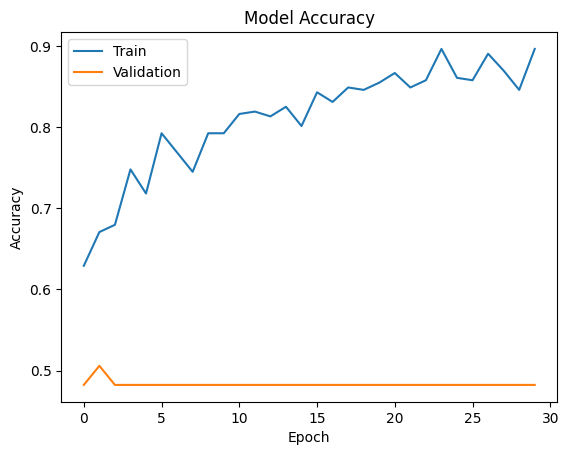

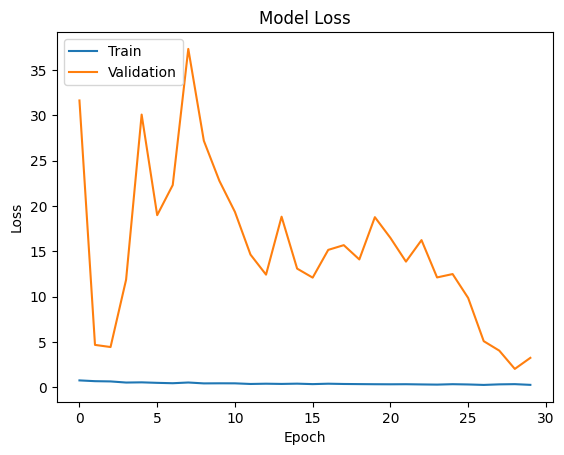

In [74]:

# 입력 데이터 shape
input_shape = (16,240)
# 출력 데이터 shape
output_shape = 1
num_samples = 422

# 모델 생성
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape)) 
model.add(tf.keras.layers.Dense(2048, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(16, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))  # 출력 레이어

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(total_data_dips, y1, epochs=30, batch_size=32, validation_split=0.2)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data_240, test_labels)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/100
22/22 [==============================] - 3s 24ms/step - loss: 0.8221 - accuracy: 0.5994 - val_loss: 47.6253 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 2/100
22/22 [==============================] - 0s 9ms/step - loss: 0.6904 - accuracy: 0.6350 - val_loss: 10.9402 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 3/100
22/22 [==============================] - 0s 8ms/step - loss: 0.6952 - accuracy: 0.6469 - val_loss: 1.2025 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 4/100
22/22 [==============================] - 0s 7ms/step - loss: 0.6058 - accuracy: 0.6884 - val_loss: 3.3516 - val_accuracy: 0.4824 - lr: 0.0010
Epoch 5/100
22/22 [==============================] - 0s 7ms/step - loss: 0.5439 - accuracy: 0.7537 - val_loss: 4.4121 - val_accuracy: 0.4824 - lr: 0.0010
Epoch 6/100
22/22 [==============================] - 0s 8ms/step - loss: 0.5376 - accuracy: 0.7300 - val_loss: 7.1819 - val_accuracy: 0.4824 - lr: 0.0010
Epoch 7/100
22/22 [==============================] - 0s 7ms/step - loss: 

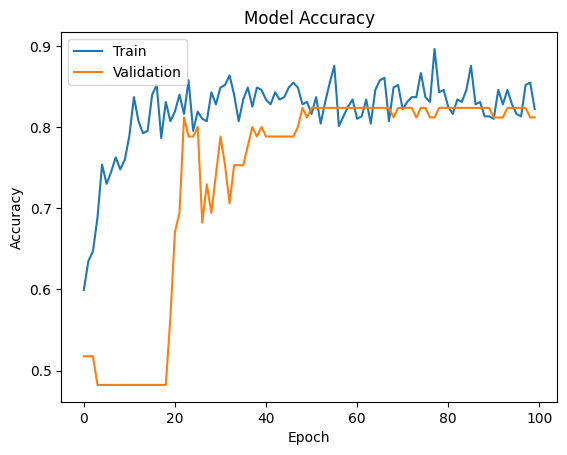

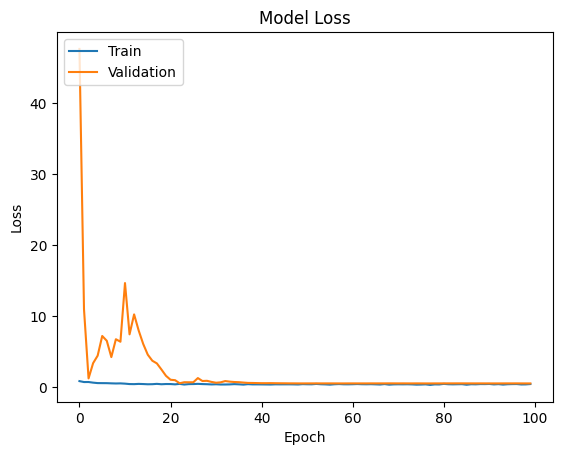

In [80]:
#가장 좋은 아웃풋 내놓음 


# 입력 데이터 shape
input_shape = (16,240)
# 출력 데이터 shape
output_shape = 1
# 데이터 개수
num_samples = 422
K.clear_session()

# 모델 생성
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape)) 
model.add(tf.keras.layers.Dense(64, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(32, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))  # 출력 레이어
callbacks_list = [
                  callbacks.ModelCheckpoint(filepath='DNN_try.h5', 
                                            monitor='val_loss', 
                                            save_best_only=True),
                  callbacks.ReduceLROnPlateau(monitor='val_loss',
                                              factor=0.1,
                                              patience=10)
                  ]
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(total_data_dips, y1, epochs=100, batch_size=16, validation_split=0.2,callbacks=callbacks_list)

draw(history)


In [81]:
test_loss, test_accuracy = model.evaluate(test_data_240, y1_test)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


5/5 [==============================] - 0s 4ms/step - loss: 0.4995 - accuracy: 0.8403
Test Loss: 0.49949169158935547
Test Accuracy: 0.8402777910232544


Epoch 1/100
22/22 [==============================] - 3s 18ms/step - loss: 0.9180 - accuracy: 0.5757 - val_loss: 46.0411 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 2/100
22/22 [==============================] - 0s 9ms/step - loss: 0.8909 - accuracy: 0.5816 - val_loss: 23.9089 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 3/100
22/22 [==============================] - 0s 9ms/step - loss: 0.8907 - accuracy: 0.5668 - val_loss: 16.6922 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 4/100
22/22 [==============================] - 0s 9ms/step - loss: 0.7709 - accuracy: 0.5846 - val_loss: 6.9911 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 5/100
22/22 [==============================] - 0s 9ms/step - loss: 0.7956 - accuracy: 0.5935 - val_loss: 6.0954 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 6/100
22/22 [==============================] - 0s 9ms/step - loss: 0.8273 - accuracy: 0.5816 - val_loss: 0.5817 - val_accuracy: 0.6706 - lr: 0.0010
Epoch 7/100
22/22 [==============================] - 0s 7ms/step - loss:

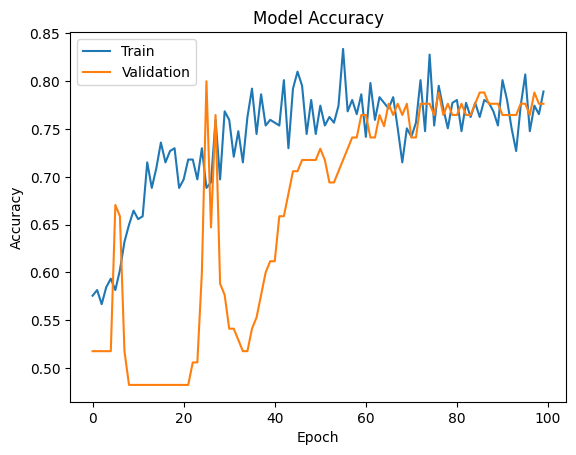

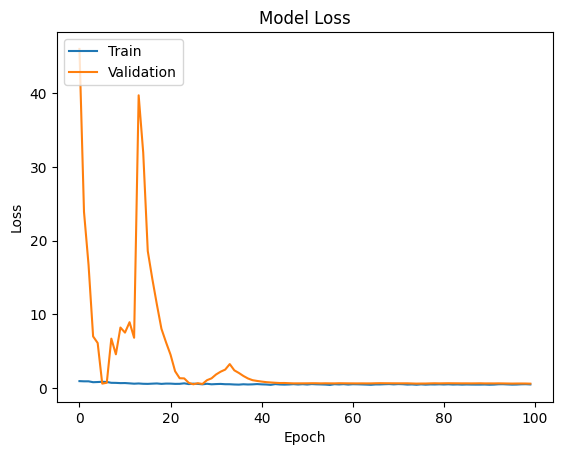

In [102]:

# 입력 데이터 shape
input_shape = (16,240)
# 출력 데이터 shape
output_shape = 1
# 데이터 개수
num_samples = 422
K.clear_session()

# 모델 생성
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape)) 
model.add(tf.keras.layers.Dense(64, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(32, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))  # 출력 레이어
callbacks_list = [
                  callbacks.ModelCheckpoint(filepath='DNN_try_y2.h5', 
                                            monitor='val_loss', 
                                            save_best_only=True),
                  callbacks.ReduceLROnPlateau(monitor='val_loss',
                                              factor=0.1,
                                              patience=10)
                  ]
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(total_data_dips, y2, epochs=100, batch_size=16, validation_split=0.2,callbacks=callbacks_list)

draw(history)

In [103]:
test_loss, test_accuracy = model.evaluate(test_data_240, y2_test)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


5/5 [==============================] - 0s 4ms/step - loss: 5.3322 - accuracy: 0.7361
Test Loss: 5.33223819732666
Test Accuracy: 0.7361111044883728


Epoch 1/100
22/22 [==============================] - 3s 19ms/step - loss: 0.9004 - accuracy: 0.5905 - val_loss: 15.9895 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 2/100
22/22 [==============================] - 0s 9ms/step - loss: 0.6662 - accuracy: 0.6944 - val_loss: 5.5540 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 3/100
22/22 [==============================] - 0s 8ms/step - loss: 0.6090 - accuracy: 0.6973 - val_loss: 5.6436 - val_accuracy: 0.4824 - lr: 0.0010
Epoch 4/100
22/22 [==============================] - 0s 6ms/step - loss: 0.6025 - accuracy: 0.7092 - val_loss: 11.8569 - val_accuracy: 0.4824 - lr: 0.0010
Epoch 5/100
22/22 [==============================] - 0s 8ms/step - loss: 0.4703 - accuracy: 0.7656 - val_loss: 11.0281 - val_accuracy: 0.4824 - lr: 0.0010
Epoch 6/100
22/22 [==============================] - 0s 8ms/step - loss: 0.5270 - accuracy: 0.7685 - val_loss: 10.3305 - val_accuracy: 0.4824 - lr: 0.0010
Epoch 7/100
22/22 [==============================] - 0s 10ms/step - los

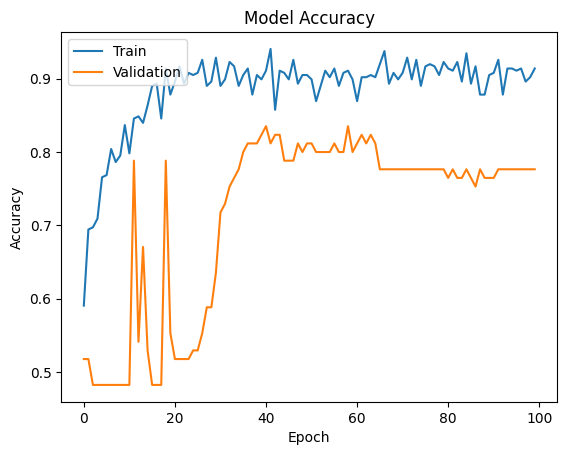

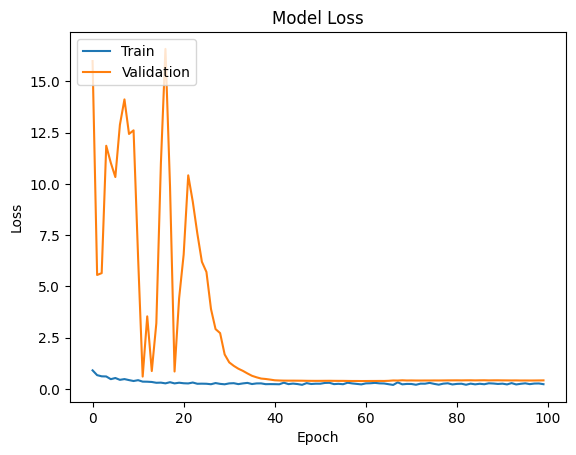

In [104]:
#가장 좋은 아웃풋 내놓음 


# 입력 데이터 shape
input_shape = (16,240)
# 출력 데이터 shape
output_shape = 1
# 데이터 개수
num_samples = 422
K.clear_session()

# 모델 생성
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape)) 
model.add(tf.keras.layers.Dense(64, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(32, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))  # 출력 레이어
callbacks_list = [
                  callbacks.ModelCheckpoint(filepath='DNN_try_y3.h5', 
                                            monitor='val_loss', 
                                            save_best_only=True),
                  callbacks.ReduceLROnPlateau(monitor='val_loss',
                                              factor=0.1,
                                              patience=10)
                  ]
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(total_data_dips, y3, epochs=100, batch_size=16, validation_split=0.2,callbacks=callbacks_list)

draw(history)

In [105]:
test_loss, test_accuracy = model.evaluate(test_data_240, y3_test)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

5/5 [==============================] - 0s 4ms/step - loss: 0.3546 - accuracy: 0.8681
Test Loss: 0.3545765280723572
Test Accuracy: 0.8680555820465088


Epoch 1/100
22/22 [==============================] - 3s 18ms/step - loss: 0.9091 - accuracy: 0.5430 - val_loss: 36.5517 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 2/100
22/22 [==============================] - 0s 9ms/step - loss: 0.8140 - accuracy: 0.5608 - val_loss: 27.5671 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 3/100
22/22 [==============================] - 0s 8ms/step - loss: 0.8262 - accuracy: 0.5697 - val_loss: 21.4465 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 4/100
22/22 [==============================] - 0s 9ms/step - loss: 0.7733 - accuracy: 0.6113 - val_loss: 17.6104 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 5/100
22/22 [==============================] - 0s 8ms/step - loss: 0.6716 - accuracy: 0.6706 - val_loss: 13.4351 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 6/100
22/22 [==============================] - 0s 6ms/step - loss: 0.6615 - accuracy: 0.6617 - val_loss: 14.4577 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 7/100
22/22 [==============================] - 0s 7ms/step - lo

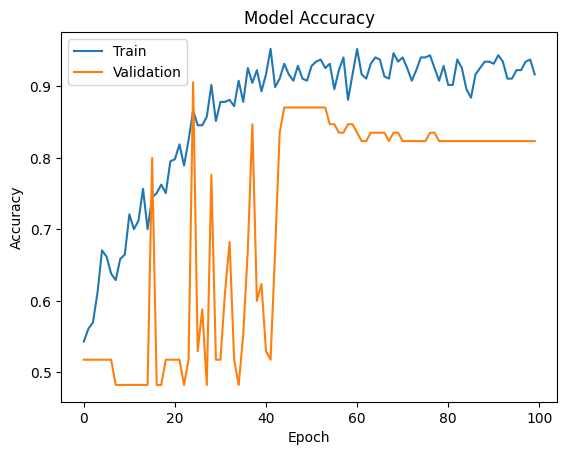

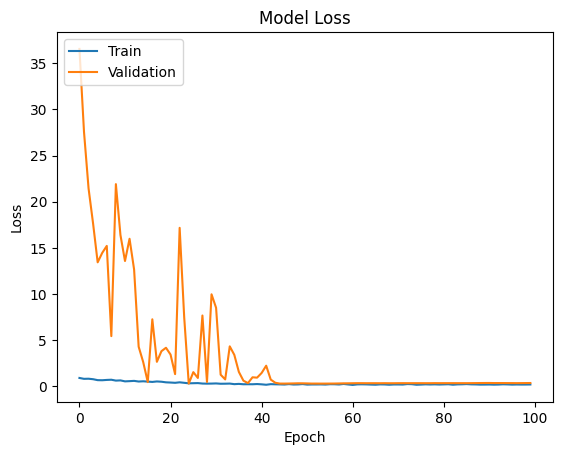

In [111]:
#가장 좋은 아웃풋 내놓음 


# 입력 데이터 shape
input_shape = (16,240)
# 출력 데이터 shape
output_shape = 1
# 데이터 개수
num_samples = 422
K.clear_session()

# 모델 생성
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape)) 
model.add(tf.keras.layers.Dense(64, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(32, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))  # 출력 레이어
callbacks_list = [
                  callbacks.ModelCheckpoint(filepath='DNN_try_y3.h5', 
                                            monitor='val_loss', 
                                            save_best_only=True),
                  callbacks.ReduceLROnPlateau(monitor='val_loss',
                                              factor=0.1,
                                              patience=10)
                  ]
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(total_data_dips, y4, epochs=100, batch_size=16, validation_split=0.2,callbacks=callbacks_list)

draw(history)

In [113]:
test_loss, test_accuracy = model.evaluate(test_data_240, y4_test)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

5/5 [==============================] - 0s 4ms/step - loss: 0.8322 - accuracy: 0.7361
Test Loss: 0.8322107195854187
Test Accuracy: 0.7361111044883728


이 밑으로는 시도해봤으나 결과가 좋지 못함, 전에 4차원벡터를 결과로 놓고 했을떄와 비슷함, 볼필요는 없음

In [ ]:
#가장 좋은 아웃풋 내놓음 


# 입력 데이터 shape
input_shape = (16,240)
# 출력 데이터 shape
output_shape = 1
# 데이터 개수
num_samples = 422
K.clear_session()

# 모델 생성
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape)) 
model.add(tf.keras.layers.Dense(64, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(32, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))  # 출력 레이어
callbacks_list = [
                  callbacks.ModelCheckpoint(filepath='DNN_try.h5', 
                                            monitor='val_loss', 
                                            save_best_only=True),
                  callbacks.ReduceLROnPlateau(monitor='val_loss',
                                              factor=0.1,
                                              patience=10)
                  ]
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(total_data_dips, y1, epochs=100, batch_size=16, validation_split=0.2,callbacks=callbacks_list)

draw(history)

Epoch 1/100
22/22 [==============================] - 4s 30ms/step - loss: 0.6913 - accuracy: 0.4629 - val_loss: 0.7100 - val_accuracy: 0.5176
Epoch 2/100
22/22 [==============================] - 0s 8ms/step - loss: 0.6899 - accuracy: 0.5341 - val_loss: 0.7057 - val_accuracy: 0.5176
Epoch 3/100
22/22 [==============================] - 0s 9ms/step - loss: 0.6907 - accuracy: 0.5312 - val_loss: 0.7024 - val_accuracy: 0.5176
Epoch 4/100
22/22 [==============================] - 0s 8ms/step - loss: 0.6956 - accuracy: 0.4481 - val_loss: 0.6993 - val_accuracy: 0.5176
Epoch 5/100
22/22 [==============================] - 0s 9ms/step - loss: 0.6960 - accuracy: 0.4896 - val_loss: 0.6974 - val_accuracy: 0.5176
Epoch 6/100
22/22 [==============================] - 0s 12ms/step - loss: 0.6925 - accuracy: 0.4926 - val_loss: 0.6953 - val_accuracy: 0.5176
Epoch 7/100
22/22 [==============================] - 0s 13ms/step - loss: 0.6948 - accuracy: 0.4807 - val_loss: 0.6941 - val_accuracy: 0.5176
Epoch 8/10

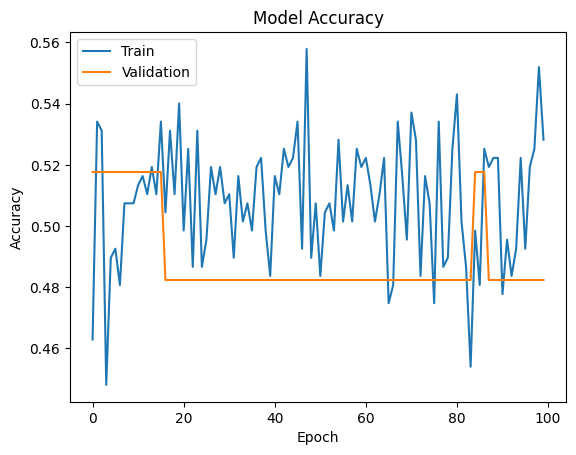

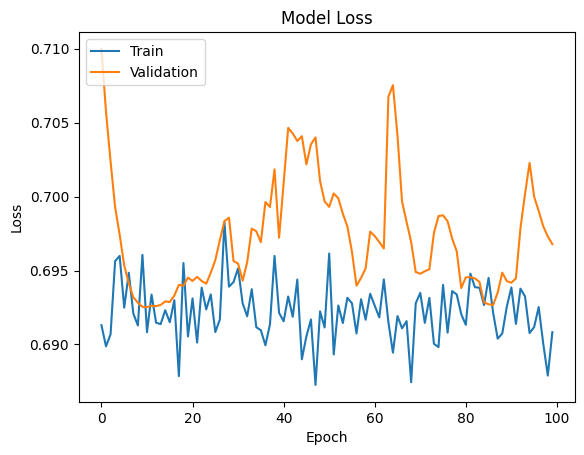

In [89]:

import tensorflow as tf

# 입력 데이터 shape
input_shape = (16,240)  
# 출력 데이터 shape
output_shape = 1

# 모델 생성
model = tf.keras.Sequential()
model.add(tf.keras.layers.GRU(4, input_shape=input_shape, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(tf.keras.layers.Dense(16, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))
# 모델 컴파일

callbacks_list = [
                  callbacks.ModelCheckpoint(filepath='DNN_try.h5', 
                                            monitor='val_loss', 
                                            save_best_only=True),
                  callbacks.ReduceLROnPlateau(monitor='val_loss',
                                              factor=0.1,
                                              patience=10)
                  ]
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# 모델 요약 출력

history = model.fit(total_data_dips, y1, epochs=100, batch_size=16, validation_split=0.2)



In [90]:
test_loss, test_accuracy = model.evaluate(test_data_240, y1_test)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


5/5 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5069
Test Loss: 0.6895498037338257
Test Accuracy: 0.5069444179534912


In [ ]:
draw(history)

Epoch 1/50
11/11 [==============================] - 5s 59ms/step - loss: 0.7595 - accuracy: 0.2136 - val_loss: 0.7393 - val_accuracy: 0.2471
Epoch 2/50
11/11 [==============================] - 0s 11ms/step - loss: 0.7173 - accuracy: 0.2819 - val_loss: 0.7315 - val_accuracy: 0.2471
Epoch 3/50
11/11 [==============================] - 0s 12ms/step - loss: 0.7252 - accuracy: 0.2997 - val_loss: 0.7282 - val_accuracy: 0.2471
Epoch 4/50
11/11 [==============================] - 0s 16ms/step - loss: 0.7126 - accuracy: 0.2700 - val_loss: 0.7243 - val_accuracy: 0.2471
Epoch 5/50
11/11 [==============================] - 0s 16ms/step - loss: 0.7037 - accuracy: 0.2641 - val_loss: 0.7189 - val_accuracy: 0.2471
Epoch 6/50
11/11 [==============================] - 0s 17ms/step - loss: 0.6993 - accuracy: 0.2463 - val_loss: 0.7177 - val_accuracy: 0.2471
Epoch 7/50
11/11 [==============================] - 0s 17ms/step - loss: 0.7110 - accuracy: 0.2344 - val_loss: 0.7158 - val_accuracy: 0.2471
Epoch 8/50
11

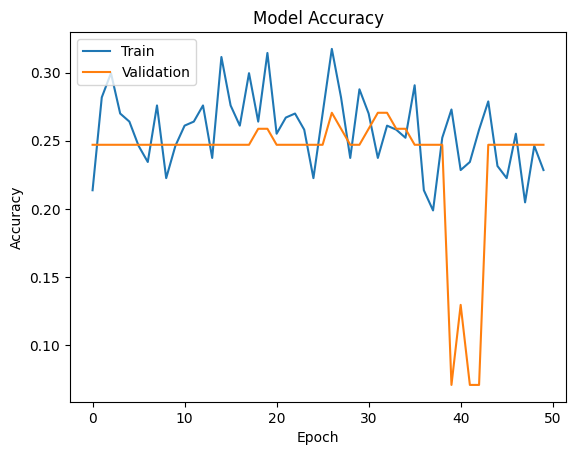

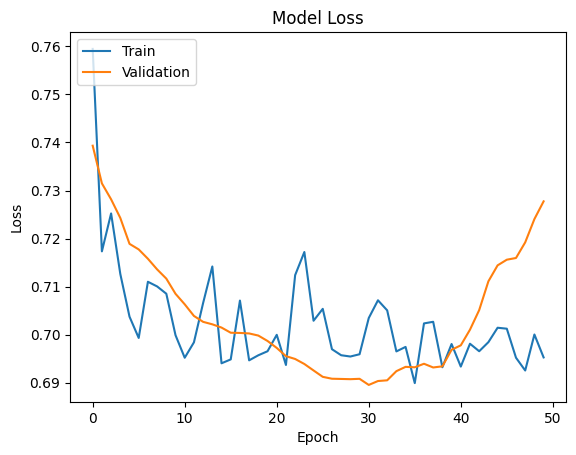

In [66]:
import tensorflow as tf

# 입력 데이터 shape
input_shape = (16,240)  
# 출력 데이터 shape
output_shape = 4

# 모델 생성
model = tf.keras.Sequential()
model.add(tf.keras.layers.GRU(16, input_shape=input_shape, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(64, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))
callbacks_list = [
                  callbacks.ModelCheckpoint(filepath='GRU.h5', 
                                            monitor='val_loss', 
                                            save_best_only=True),
                  callbacks.ReduceLROnPlateau(monitor='val_loss',
                                              factor=0.1,
                                              patience=10)
                  ]
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(total_data_dips, outputvec_dips, epochs=50, batch_size=32, validation_split=0.2)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [93]:
test_loss, test_accuracy = model.evaluate(test_data_240, y1_test)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


5/5 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5069
Test Loss: 0.6895498037338257
Test Accuracy: 0.5069444179534912


Epoch 1/100
11/11 [==============================] - 3s 46ms/step - loss: 705.6901 - accuracy: 0.5045 - val_loss: 185.1409 - val_accuracy: 0.4824
Epoch 2/100
11/11 [==============================] - 0s 10ms/step - loss: 76.4364 - accuracy: 0.4807 - val_loss: 15.5912 - val_accuracy: 0.5176
Epoch 3/100
11/11 [==============================] - 0s 10ms/step - loss: 13.4905 - accuracy: 0.5015 - val_loss: 58.9749 - val_accuracy: 0.4824
Epoch 4/100
11/11 [==============================] - 0s 10ms/step - loss: 20.4556 - accuracy: 0.5193 - val_loss: 0.8720 - val_accuracy: 0.5882
Epoch 5/100
11/11 [==============================] - 0s 9ms/step - loss: 18.8851 - accuracy: 0.4570 - val_loss: 25.1669 - val_accuracy: 0.5176
Epoch 6/100
11/11 [==============================] - 0s 11ms/step - loss: 21.2701 - accuracy: 0.4896 - val_loss: 39.9743 - val_accuracy: 0.4824
Epoch 7/100
11/11 [==============================] - 0s 11ms/step - loss: 34.2210 - accuracy: 0.4570 - val_loss: 19.7056 - val_accuracy:

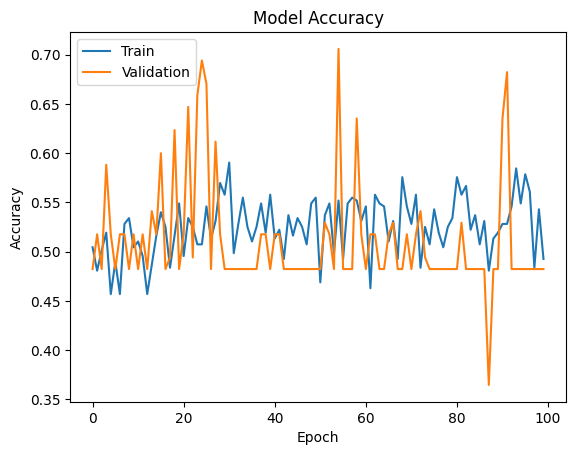

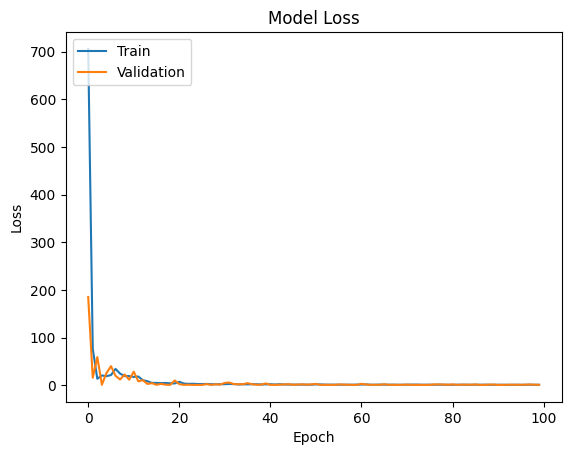

In [95]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Dropout, Conv1D

# 입력 데이터의 크기
num_frames = 16
num_coords = 240
input_shape = (num_frames, num_coords)

# 출력 벡터의 크기
output_shape = 1

# 트랜스포머 모델 정의
def create_transformer_model(input_shape, output_shape):
    inputs = Input(shape=input_shape)

    # 멀티헤드 어텐션
    attention_output = MultiHeadAttention(
        num_heads=8, key_dim=64, dropout=0.1
    )(inputs, inputs)
    attention_output = LayerNormalization(epsilon=1e-6)(attention_output)
    attention_output = Dropout(0.2)(attention_output + inputs)

    # 피드포워드 네트워크
    feed_forward_output = Conv1D(filters=512, kernel_size=2, strides=2,  activation="relu")(attention_output)
    feed_forward_output = Conv1D(filters=256, kernel_size=2, strides=2, activation="relu")(feed_forward_output)


    model = Model(inputs=inputs, outputs=feed_forward_output)
    return model

# 모델 생성
model = create_transformer_model(input_shape, output_shape)

# GlobalAveragePooling1D 레이어 추가
global_average_output = GlobalAveragePooling1D()(model.output)

# 출력 레이어 추가
output = Dense(output_shape, activation='sigmoid')(global_average_output)

# 모델 재구성
model = Model(inputs=model.input, outputs=output)

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(total_data_dips, y1, epochs=100, batch_size=32, validation_split=0.2)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




In [ ]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


5/5 [==============================] - 0s 6ms/step - loss: 0.6868 - accuracy: 0.0764
Test Loss: 0.6868391036987305
Test Accuracy: 0.0763888880610466


In [ ]:
data_changed.shape

(422, 5, 16, 48)

In [ ]:
y_label.shape

(422, 4)

In [29]:
model=123

In [30]:
from tensorflow.keras.layers import Input, GRU, concatenate, Dense,LSTM
from tensorflow.keras.models import Model

input_ = Input(shape=(5,16, 48))

x1 = LSTM(4, return_sequences=False)(input_[:, 0, :, :])
x1 = Model(inputs=input_, outputs=x1)

x2 = LSTM(4, return_sequences=False)(input_[:, 1, :, :])
x2 = Model(inputs=input_, outputs=x2)

x3 = LSTM(4, return_sequences=False)(input_[:, 2, :, :])
x3 = Model(inputs=input_, outputs=x3)

x4 = LSTM(4, return_sequences=False)(input_[:, 3, :, :])
x4 = Model(inputs=input_, outputs=x4)

x5 = LSTM(4, return_sequences=False)(input_[:, 4, :, :])
x5 = Model(inputs=input_, outputs=x5)

combined = concatenate([x1.output, x2.output, x3.output, x4.output, x5.output])
z = Dense(1, activation="sigmoid")(combined)

model = Model(inputs=input_, outputs=z)



In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(data_changed, y1, epochs=30, batch_size=32, validation_split=0.2)



Epoch 1/30
11/11 [==============================] - 11s 172ms/step - loss: 0.7029 - accuracy: 0.5134 - val_loss: 0.7088 - val_accuracy: 0.4941
Epoch 2/30
11/11 [==============================] - 0s 15ms/step - loss: 0.7013 - accuracy: 0.5134 - val_loss: 0.7064 - val_accuracy: 0.4941
Epoch 3/30
11/11 [==============================] - 0s 16ms/step - loss: 0.6998 - accuracy: 0.5134 - val_loss: 0.7045 - val_accuracy: 0.4941
Epoch 4/30
11/11 [==============================] - 0s 17ms/step - loss: 0.6985 - accuracy: 0.5134 - val_loss: 0.7022 - val_accuracy: 0.4941
Epoch 5/30
11/11 [==============================] - 0s 15ms/step - loss: 0.6944 - accuracy: 0.5134 - val_loss: 0.6896 - val_accuracy: 0.4941
Epoch 6/30
11/11 [==============================] - 0s 15ms/step - loss: 0.6960 - accuracy: 0.5134 - val_loss: 0.6926 - val_accuracy: 0.4941
Epoch 7/30
11/11 [==============================] - 0s 16ms/step - loss: 0.6930 - accuracy: 0.5134 - val_loss: 0.6930 - val_accuracy: 0.4941
Epoch 8/30


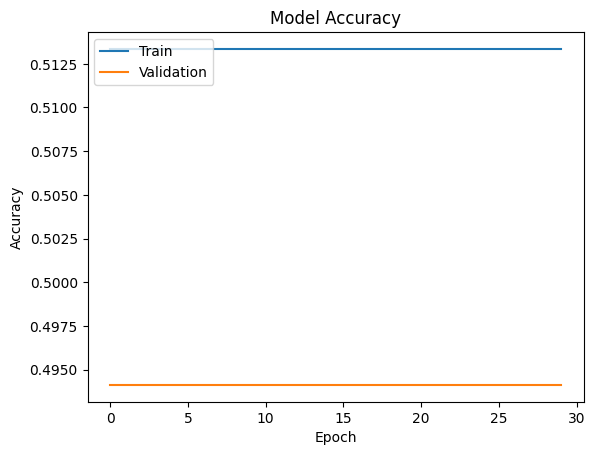

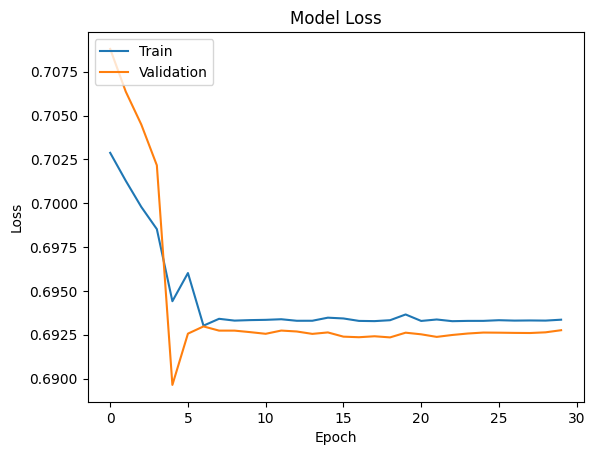

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


5/5 [==============================] - 0s 6ms/step - loss: 0.6920 - accuracy: 0.2500
Test Loss: 0.6920265555381775
Test Accuracy: 0.25


In [ ]:

def thresholded_sigmoid(x, threshold=0.5):
    return K.cast(K.greater(x, threshold), K.floatx())

Epoch 1/50
11/11 [==============================] - 15s 164ms/step - loss: 0.7641 - accuracy: 0.1246 - val_loss: 0.7593 - val_accuracy: 0.1294
Epoch 2/50
11/11 [==============================] - 0s 22ms/step - loss: 0.7377 - accuracy: 0.1246 - val_loss: 0.7364 - val_accuracy: 0.1294
Epoch 3/50
11/11 [==============================] - 0s 17ms/step - loss: 0.7207 - accuracy: 0.1246 - val_loss: 0.7222 - val_accuracy: 0.1294
Epoch 4/50
11/11 [==============================] - 0s 17ms/step - loss: 0.7100 - accuracy: 0.1246 - val_loss: 0.7131 - val_accuracy: 0.1294
Epoch 5/50
11/11 [==============================] - 0s 16ms/step - loss: 0.7045 - accuracy: 0.1246 - val_loss: 0.7062 - val_accuracy: 0.1294
Epoch 6/50
11/11 [==============================] - 0s 18ms/step - loss: 0.6996 - accuracy: 0.1246 - val_loss: 0.7025 - val_accuracy: 0.1294
Epoch 7/50
11/11 [==============================] - 0s 20ms/step - loss: 0.6973 - accuracy: 0.1246 - val_loss: 0.6997 - val_accuracy: 0.1294
Epoch 8/50


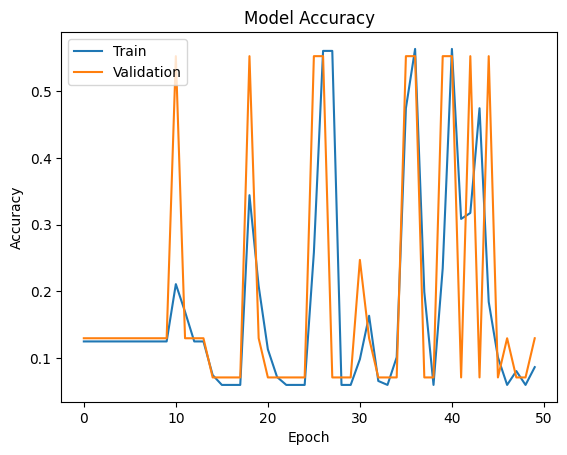

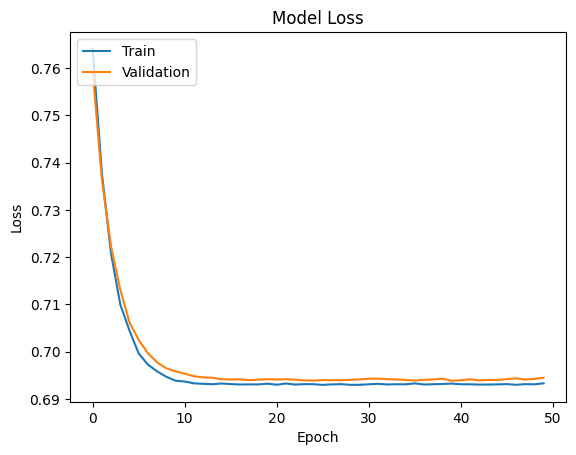

In [ ]:
from tensorflow.keras.layers import Input, LSTM, concatenate, Dense,GRU
from tensorflow.keras.models import Model

input_ = Input(shape=(5, 16, 48))

x1 = GRU(4, return_sequences=False)(input_[:, 0, :, :])
x1 = Dense(16, activation="sigmoid")(x1)
x1 = Dense(4, activation="sigmoid")(x1)

x2 = GRU(4, return_sequences=False)(input_[:, 1, :, :])
x2 = Dense(16, activation="sigmoid")(x2)
x2 = Dense(4, activation="relu")(x2)

x3 = GRU(4, return_sequences=False)(input_[:, 2, :, :])
x3 = Dense(16, activation="sigmoid")(x3)
x3 = Dense(4, activation="relu")(x3)

x4 = GRU(4, return_sequences=False)(input_[:, 3, :, :])
x4 = Dense(16, activation="sigmoid")(x4)
x4 = Dense(4, activation="relu")(x4)

x5 = GRU(4, return_sequences=False)(input_[:, 4, :, :])
x5 = Dense(16, activation="sigmoid")(x5)
x5 = Dense(4, activation="relu")(x5)

combined = concatenate([x1, x2, x3, x4, x5])
z = Dense(4, activation="sigmoid")(combined)

model = Model(inputs=input_, outputs=z)
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

history=model.fit(data_changed, y_label, batch_size=32, epochs=50, validation_split=0.2)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


5/5 [==============================] - 0s 8ms/step - loss: 0.6936 - accuracy: 0.1250
Test Loss: 0.6935666799545288
Test Accuracy: 0.125


In [96]:
model=123

In [100]:
K.clear_session()

input_ = Input(shape=(5, 16, 48))
attention = MultiHeadAttention(num_heads=8, key_dim=16)

x1 = attention(input_[:, 0, :, :], input_[:, 0, :, :])
x1 = LayerNormalization(epsilon=1e-6)(x1)
x1 = TimeDistributed(Dense(4, activation=relu))(x1)
x1 = LayerNormalization(epsilon=1e-6)(x1)
x1 = Flatten()(x1)
x1 = Dense(16, activation=relu)(x1)
x1 = Dropout(0.2)(x1)
output = Dense(4, activation="sigmoid")(x1)
x1 = Model(inputs=input_, outputs=output)


x2 = attention(input_[:, 1, :, :], input_[:, 1, :, :])
x2 = LayerNormalization(epsilon=1e-6)(x2)
x2 = TimeDistributed(Dense(4, activation=relu))(x2)
x2 = LayerNormalization(epsilon=1e-6)(x2)
x2 = Flatten()(x2)
x2 = Dense(16, activation=relu)(x2)
x2 = Dropout(0.2)(x2)
output = Dense(4, activation="sigmoid")(x2)
x2 = Model(inputs=input_, outputs=output)

x3 = attention(input_[:, 2, :, :], input_[:, 2, :, :])
x3 = LayerNormalization(epsilon=1e-6)(x3)
x3 = TimeDistributed(Dense(4, activation=relu))(x3)
x3 = LayerNormalization(epsilon=1e-6)(x3)
x3 = Flatten()(x3)
x3 = Dense(16, activation=relu)(x3)
x3 = Dropout(0.2)(x3)
output = Dense(4, activation="sigmoid")(x3)
x3 = Model(inputs=input_, outputs=output)
x4 = attention(input_[:, 3, :, :], input_[:, 3, :, :])
x4 = LayerNormalization(epsilon=1e-6)(x4)
x4 = TimeDistributed(Dense(4, activation=relu))(x4)
x4 = LayerNormalization(epsilon=1e-6)(x4)
x4 = Flatten()(x4)
x4 = Dense(16, activation=relu)(x4)
x4 = Dropout(0.2)(x4)
output = Dense(4, activation="sigmoid")(x4)
x4 = Model(inputs=input_, outputs=output)



x5 = attention(input_[:, 4, :, :], input_[:, 4, :, :])
x5 = LayerNormalization(epsilon=1e-6)(x5)
x5 = TimeDistributed(Dense(4, activation=relu))(x5)
x5 = LayerNormalization(epsilon=1e-6)(x5)
x5 = Flatten()(x5)
x5 = Dense(16, activation=relu)(x5)
x5 = Dropout(0.2)(x5)
output = Dense(4, activation="sigmoid")(x5)
x5 = Model(inputs=input_, outputs=output)

combined = concatenate([x1.output, x2.output, x3.output, x4.output, x5.output])
z = Dense(1, activation="sigmoid")(combined)

model = Model(inputs=input_, outputs=z)
callbacks_list = [
                  callbacks.ModelCheckpoint(filepath='rnn_tf_y1.h5', 
                                            monitor='val_loss', 
                                            save_best_only=True),
                  callbacks.ReduceLROnPlateau(monitor='val_loss',
                                              factor=0.1,
                                              patience=10)
                  ]
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(data_changed, y2, epochs=100, batch_size=16, validation_split=0.2,callbacks=callbacks_list)



Epoch 1/100
22/22 [==============================] - 13s 52ms/step - loss: 0.6985 - accuracy: 0.4955 - val_loss: 0.7004 - val_accuracy: 0.4824 - lr: 0.0010
Epoch 2/100
22/22 [==============================] - 1s 25ms/step - loss: 0.6957 - accuracy: 0.5252 - val_loss: 0.6926 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 3/100
22/22 [==============================] - 0s 20ms/step - loss: 0.6970 - accuracy: 0.5223 - val_loss: 0.6942 - val_accuracy: 0.4824 - lr: 0.0010
Epoch 4/100
22/22 [==============================] - 0s 17ms/step - loss: 0.6966 - accuracy: 0.5312 - val_loss: 0.6974 - val_accuracy: 0.4824 - lr: 0.0010
Epoch 5/100
22/22 [==============================] - 0s 20ms/step - loss: 0.6972 - accuracy: 0.4896 - val_loss: 0.6944 - val_accuracy: 0.4824 - lr: 0.0010
Epoch 6/100
22/22 [==============================] - 0s 18ms/step - loss: 0.6983 - accuracy: 0.5163 - val_loss: 0.6930 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 7/100
22/22 [==============================] - 0s 20ms/step - l

KeyboardInterrupt: ignored

In [33]:
data_changed.shape

(422, 5, 16, 48)

In [34]:
view1=[]
view2=[]
view3=[]
view4=[]
view5=[]

In [35]:
for i in data_changed:
    view1.append(i[0])
    view2.append(i[1])
    view3.append(i[2])
    view4.append(i[3])
    view5.append(i[4])

view1=np.array(view1)
view2=np.array(view2)
view3=np.array(view3)
view4=np.array(view4)
view5=np.array(view5)


In [36]:
len(view1)

422

In [37]:
view1.shape

(422, 16, 48)

In [45]:
text_x .shape

(144, 5, 16, 48)

In [46]:
test1=[]
test2=[]
test3=[]
test4=[]
test5=[]

In [47]:

for i in text_x:
    test1.append(i[0])
    test2.append(i[1])
    test3.append(i[2])
    test4.append(i[3])
    test5.append(i[4])

test1=np.array(view1)
test2=np.array(view2)
test3=np.array(view3)
test4=np.array(view4)
test5=np.array(view5)


In [48]:
dataset=[test1,test2,test3,test4,test5]

In [70]:
import tensorflow as tf

# 입력 데이터 shape
input_shape = (16, 48)
# 출력 데이터 shape
output_shape =1

models = []
for view_data in [view1, view2, view3, view4, view5]:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(tf.keras.layers.Dense(32, activation='sigmoid'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(view_data, y1, epochs=30, batch_size=16, validation_split=0.2)
    models.append(model)  # 모델 자체를 저장

    # 모델 저장
    model.save(f'model_{len(models)}.h5')


Epoch 1/30
22/22 [==============================] - 3s 22ms/step - loss: 0.8001 - accuracy: 0.5098 - val_loss: 0.7521 - val_accuracy: 0.4824
Epoch 2/30
22/22 [==============================] - 0s 11ms/step - loss: 0.7178 - accuracy: 0.4996 - val_loss: 0.7518 - val_accuracy: 0.4824
Epoch 3/30
22/22 [==============================] - 0s 8ms/step - loss: 0.6970 - accuracy: 0.4928 - val_loss: 0.7622 - val_accuracy: 0.4824
Epoch 4/30
22/22 [==============================] - 0s 9ms/step - loss: 0.6973 - accuracy: 0.5061 - val_loss: 0.7649 - val_accuracy: 0.4824
Epoch 5/30
22/22 [==============================] - 0s 9ms/step - loss: 0.6970 - accuracy: 0.4968 - val_loss: 0.7630 - val_accuracy: 0.4824
Epoch 6/30
22/22 [==============================] - 0s 12ms/step - loss: 0.6937 - accuracy: 0.5085 - val_loss: 0.7728 - val_accuracy: 0.4824
Epoch 7/30
22/22 [==============================] - 0s 16ms/step - loss: 0.6940 - accuracy: 0.5035 - val_loss: 0.7775 - val_accuracy: 0.4824
Epoch 8/30
22/22

In [71]:
model_files = ['model_1.h5', 'model_2.h5', 'model_3.h5', 'model_4.h5', 'model_5.h5']

loaded_models = []
for model_file in model_files:
    loaded_model = tf.keras.models.load_model(model_file)
    loaded_models.append(loaded_model)

In [72]:
import numpy as np

# Majority Vote 함수
def majority_vote(predictions):
    votes = np.round(predictions)  # 반올림하여 0 또는 1로 변환
    majority = np.mean(votes, axis=0)  # 열 단위로 평균 계산
    return np.round(majority)  # 다수결로 결정된 값을 반올림하여 0 또는 1로 변환

# 테스트 세트에 대한 예측 수행
test_predictions = []
for model,test_data in zip(loaded_models,dataset):
    prediction = model.predict(test_data)  # test_data: 테스트 세트 입력 데이터
    test_predictions.append(prediction)

# Majority Vote를 통한 예측
ensemble_prediction = majority_vote(test_predictions)



14/14 [==============================] - 0s 3ms/step


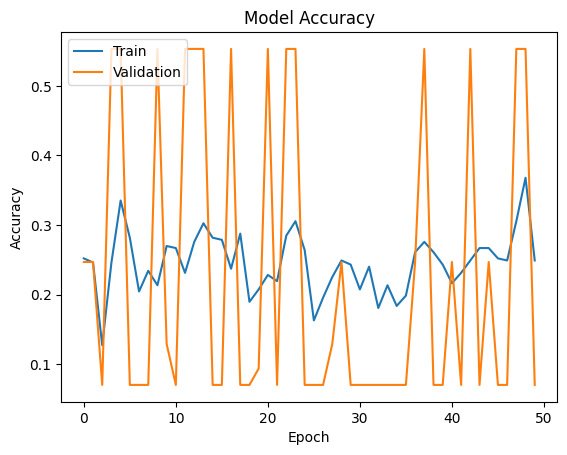

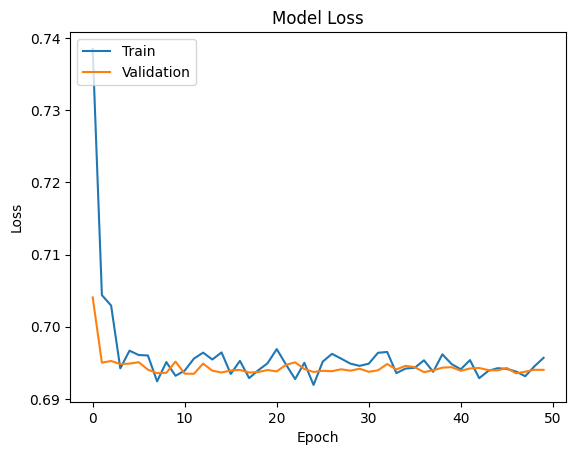

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


5/5 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.0625
Test Loss: 0.6934493780136108
Test Accuracy: 0.0625


In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
import math

from tensorflow.keras.layers import Input, GRU, concatenate, Dense
from tensorflow.keras.models import Model

threshold = 0.5

input_ = Input(shape=(5, 16, 48))

x1_input = input_[:, 0, :, :]
x1 = GRU(4, return_sequences=False)(x1_input)
x1 = Dense(4, activation="sigmoid")(x1)
x1_model = Model(inputs=x1_input, outputs=tf.where(x1 >= threshold, tf.ones_like(x1), tf.zeros_like(x1)))

x2_input = input_[:, 1, :, :]
x2 = GRU(4, return_sequences=False)(x2_input)
x2 = Dense(4, activation="sigmoid")(x2)
x2_model = Model(inputs=x2_input, outputs=tf.where(x2 >= threshold, tf.ones_like(x2), tf.zeros_like(x2)))

x3_input = input_[:, 2, :, :]
x3 = GRU(4, return_sequences=False)(x3_input)
x3 = Dense(4, activation="sigmoid")(x3)
x3_model = Model(inputs=x3_input, outputs=tf.where(x3 >= threshold, tf.ones_like(x3), tf.zeros_like(x3)))

x4_input = input_[:, 3, :, :]
x4 = GRU(4, return_sequences=False)(x4_input)
x4 = Dense(4, activation="sigmoid")(x4)
x4_model = Model(inputs=x4_input, outputs=tf.where(x4 >= threshold, tf.ones_like(x4), tf.zeros_like(x4)))

x5_input = input_[:, 4, :, :]
x5 = GRU(4, return_sequences=False)(x5_input)
x5 = Dense(4, activation="sigmoid")(x5)
x5_model = Model(inputs=x5_input, outputs=tf.where(x5 >= threshold, tf.ones_like(x5), tf.zeros_like(x5)))



# Apply majority vote
combined = concatenate([x1_model.output, x2_model.output, x3_model.output, x4_model.output, x5_model.output])
majority_vote = tf.reduce_mean(combined, axis=1) >= 0.5


model = Model(inputs=input_, outputs=z)



ValueError: ignored

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(data_changed, y_lable, batch_size=32, epochs=100, validation_split=0.2)

Epoch 1/100


11/11 [==============================] - 9s 158ms/step - loss: 0.7256 - accuracy: 0.1246 - val_loss: 0.7116 - val_accuracy: 0.1294
Epoch 2/100
11/11 [==============================] - 0s 10ms/step - loss: 0.7216 - accuracy: 0.1246 - val_loss: 0.7093 - val_accuracy: 0.1294
Epoch 3/100
11/11 [==============================] - 0s 9ms/step - loss: 0.7189 - accuracy: 0.1246 - val_loss: 0.7074 - val_accuracy: 0.1294
Epoch 4/100
11/11 [==============================] - 0s 10ms/step - loss: 0.7164 - accuracy: 0.1246 - val_loss: 0.7056 - val_accuracy: 0.1294
Epoch 5/100
11/11 [==============================] - 0s 9ms/step - loss: 0.7141 - accuracy: 0.1246 - val_loss: 0.7040 - val_accuracy: 0.1294
Epoch 6/100
11/11 [==============================] - 0s 10ms/step - loss: 0.7120 - accuracy: 0.1246 - val_loss: 0.7025 - val_accuracy: 0.1294
Epoch 7/100
11/11 [==============================] - 0s 10ms/step - loss: 0.7100 - accuracy: 0.1246 - val_loss: 0.7011 - val_accuracy: 0.1294
Epoch 8/100
11/11 [

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, GRU, concatenate, Dense
from tensorflow.keras.models import Model
from scipy.stats import mode

threshold = 0.5

input_ = Input(shape=(5, 16, 48))

x1 = GRU(4, return_sequences=False)(input_[:, 0, :, :])
x1 = Dense(4, activation="sigmoid")(x1)
x1_binary = K.cast(K.greater_equal(x1, threshold), K.floatx())

x2 = GRU(4, return_sequences=False)(input_[:, 1, :, :])
x2 = Dense(4, activation="sigmoid")(x2)
x2_binary = K.cast(K.greater_equal(x2, threshold), K.floatx())

x3 = GRU(4, return_sequences=False)(input_[:, 2, :, :])
x3 = Dense(4, activation="sigmoid")(x3)
x3_binary = K.cast(K.greater_equal(x3, threshold), K.floatx())

x4 = GRU(4, return_sequences=False)(input_[:, 3, :, :])
x4 = Dense(4, activation="sigmoid")(x4)
x4_binary = K.cast(K.greater_equal(x4, threshold), K.floatx())

x5 = GRU(4, return_sequences=False)(input_[:, 4, :, :])
x5 = Dense(4, activation="sigmoid")(x5)
x5_binary = K.cast(K.greater_equal(x5, threshold), K.floatx())

combined_binary = concatenate([x1_binary, x2_binary, x3_binary, x4_binary, x5_binary])
combined_binary = K.expand_dims(combined_binary, axis=-1)
combined_binary = K.eval(combined_binary)
combined_binary = np.squeeze(combined_binary, axis=-1)

majority_vote = mode(combined_binary, axis=-1).mode.squeeze()

model = Model(inputs=input_, outputs=majority_vote)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(data_changed, y_lable, batch_size=32, epochs=100, validation_split=0.2)





AttributeError: ignored

In [ ]:
a_data.shape

(422, 16, 48)